# Exploring different Temperature Distributions

Here we will see how increasing the temperature of our noise distribution will affect our reconstruction. 

In [12]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

rng = np.random.default_rng()

In [13]:
R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5

temperatures = np.array([5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

tau_f_list = [] 
tau_t_list = []


for temp in temperatures:
    npower = kb * temp * bw
    tau_temp = npower * R
    tau_t_list.append(tau_temp)
    tau_f_list.append(tau_temp/Nsamp)   

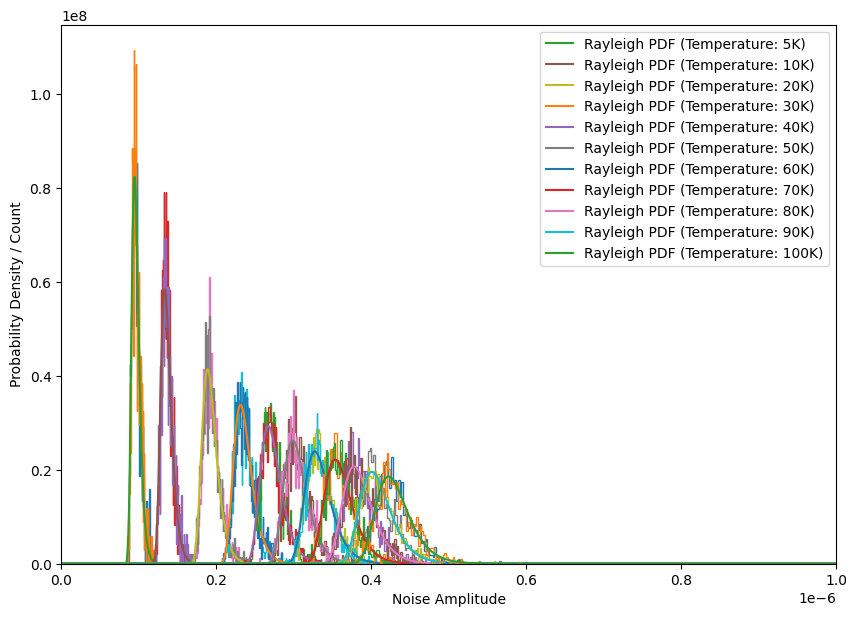

In [18]:

# x = np.linspace(2e-7,5e-7, 1001)
x = np.linspace(1e-9,9e-6, 10001)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

for j in range(len(temperatures)):

    tau_1f = tau_f_list[j]
    tau_1t = tau_t_list[j]
    temp = temperatures[j]

    ray_cdf = (1-np.exp(-(x**2)/tau_1f)) ** Nsamp
    ray_pdf = np.gradient(ray_cdf, x[1]-x[0])

    N = 1000

    noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp) # Generate a 2d gaussian
    noise = noise[:,0] + 1j * noise[:,1] # Sample from said Gaussian to get a complex number 
    noise = noise.reshape(N, Nsamp) # Reshape the gaussian to be 3d
    noise_max = np.max(abs(noise), axis=1) # Take the maximum of the N samples


    noise_time = rng.multivariate_normal([0,0],np.eye(2)*tau_1t/2, N*Nsamp) # Generate a 2d gaussian
    noise_time = noise_time[:,0] + 1j * noise_time[:,1] # Sample from said Gaussian to get a complex number
    noise_time = noise_time.reshape(N, Nsamp) # Reshape the gaussian to be 3d

    for i in range(N):
        noise_time[i] = np.fft.fft(noise_time[i], norm='forward')

    noise_time_max = np.max(abs(noise_time), axis=1) # Take the maximum of the N samples

    noise = noise.flatten()
    noise = noise.reshape(Nsamp, N)
    noise = noise[:,0]

    noise_time = np.random.normal(0, np.sqrt(tau_1t), Nsamp)
    noise_FFT = np.fft.fft(noise_time, norm='forward')
    noise_freqs = np.fft.fftfreq(Nsamp, 1e-9)

    #######################################################


    
    freq_label = f'MC Freq Domain (Temperature: {temp}K)'
    time_label = f'MC Time Domain (Temperature: {temp}K)'
    ray_label = f'Rayleigh PDF (Temperature: {temp}K)'
    
    plt.hist(abs(noise_max), bins=100, density=True, histtype='step')#, label=freq_label)
    plt.hist(abs(noise_time_max), bins=100, density=True, histtype='step')#, label=time_label)
    ax.plot(x,  ray_pdf, label=ray_label);
   


    # plt.hist(abs(noise_FFT), bins=100, density=True, histtype='step', label='FFT of Time Series')
    # plt.hist(abs(noise), bins=100, density=True, histtype='step', label='Frequency Generated Noise')

ax.set_xlim(0, 1e-6)
plt.legend()

plt.ylabel('Probability Density / Count')
plt.xlabel('Noise Amplitude')
plt.show()

#######################################################